In [5]:
import csv
import math 
import networkx as nx
import numpy as np
from operator import itemgetter
from numpy import linalg as LA

In [39]:
G=nx.Graph()
f=open("c-celgans.txt","r")
#f = open("C:/Users/endur/example.txt", "r")
edge1=[]
edge2=[]
nodelist=[]
for x in f:
    e1,e2=x.split()
    edge1.append(int(e1)-1)
    edge2.append(int(e2)-1)
    for i in (int(e1)-1,int(e2)-1):
        if i not in nodelist:
            nodelist.append(i)
n=len(nodelist)

for  i in range(0, len(edge1)):
    G.add_edge(edge1[i], edge2[i])
D={node:val for (node, val) in G.degree()}
B=nx.betweenness_centrality(G)
C=nx.closeness_centrality(G)
CC=nx.clustering(G)
G1 = nx.DiGraph(G)
pr = nx.pagerank(G1, alpha=0.85)
#print(pr)

L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
#print("Largest eigenvalue:", max(e))
#phi = (1 + math.sqrt(max(e))) / 2.0
kc= nx.katz_centrality(G,0.01)
#print(kc)
def LGC(v, alpha):
    sum=0
    for u in nodelist:
        if v!=u:
            d_ij=nx.shortest_path_length(G, source=u, target=v)
            #print(d_ij)
            #print(D[u])
            sum=sum+(math.sqrt(D[u]+alpha))/d_ij
    return sum*(D[v]/n)

lgc={}
alpha=0.5
for v in nodelist:
    lgc[v]=LGC(v,alpha)


def get_key(dictionay, val):
    for key, value in dictionay.items():
         if val == value:
             return key

def get_vertices(List):
    if type(List)==list:
        res = sorted(range(len(List)), key = lambda sub: List[sub])
        return res
    if type(List)==dict:
        res = dict(sorted(List.items(), key = itemgetter(1), reverse = True)) 
        return res

#for Degree centrality values and vertices
vertices_dd=get_vertices(D)
vertices_d=[]
values_d=[]
for i in vertices_dd:
    vertices_d.append(i)
    values_d.append(vertices_dd[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("vertices of D ", vertices_d)
print("\nvalue of D: ", values_d)

#for betweenness values and vertices   
vertices_bwd=get_vertices(B)
vertices_bw=[]
values_bw=[]
for i in vertices_bwd:
    vertices_bw.append(i)
    values_bw.append(vertices_bwd[i])
#vertices_bw.reverse()
#values_bw.reverse()
print("\nvertices of bw ", vertices_bw)
print("\nvalue of bw: ", values_bw)


#for closeness centrality values and vertices
vertices_ccd=get_vertices(C)
vertices_closec=[]
values_closec=[]
for i in vertices_ccd:
    vertices_closec.append(i)
    values_closec.append(vertices_ccd[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of closec ", vertices_closec)
print("\nvalue of closec: ", values_closec)


#for clustering coefficent centrality values and vertices
vertices_clustcd=get_vertices(CC)
vertices_clustc=[]
values_clustc=[]
for i in vertices_clustcd:
    vertices_clustc.append(i)
    values_clustc.append(vertices_clustcd[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of clustc ", vertices_clustc)
print("\nvalue of clustc: ", values_clustc)



#for page rank values and vertices
vertices_pr=get_vertices(pr)
vertices_p=[]
values_p=[]
for i in vertices_pr:
    vertices_p.append(i)
    values_p.append(vertices_pr[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of pr ", vertices_p)
print("\nvalue of pr: ", values_p)


#for Katz Centrality values and vertices
vertices_kc=get_vertices(kc)
vertices_k=[]
values_k=[]
for i in vertices_kc:
    vertices_k.append(i)
    values_k.append(vertices_kc[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of kc ", vertices_k)
print("\nvalue of kc: ", values_k)


#for lgc centrality values and vertices

vertices_lgc=get_vertices(lgc)
vertices_l=[]
values_l=[]
for i in vertices_lgc:
    vertices_l.append(i)
    values_l.append(vertices_lgc[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of lgc ", vertices_l)
print("\nvalue of lgc: ", values_l)





def IC(g,S,p=0.5,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc):
        
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len([x for x in g.neighbors(node)])) < p
                new_ones += list(np.extract(success, [x for x in g.neighbors(node)]))

            new_active = list(set(new_ones) - set(A))
            
            # Add newly activated nodes to the set of activated nodes
            A += new_active
            
        spread.append(len(A))
        
    return(np.mean(spread))

ISdc = IC(G,vertices_d[:10])
print("\n",ISdc)

ISbw = IC(G,vertices_bw[:10])
print("\n",ISbw)

ISc = IC(G,vertices_closec[:10])
print("\n",ISc)

ISclu = IC(G,vertices_clustc[:10])
print("\n",ISclu)

ISlgc = IC(G,vertices_l[:10])
print("\n",ISlgc)

vertices of D  [304, 70, 71, 77, 72, 73, 75, 76, 216, 215, 74, 197, 177, 89, 51, 88, 117, 305, 176, 81, 50, 80, 95, 218, 217, 142, 119, 116, 198, 94, 90, 221, 148, 99, 40, 159, 192, 219, 194, 114, 115, 269, 93, 17, 143, 39, 160, 118, 79, 199, 157, 120, 98, 54, 55, 78, 147, 46, 92, 3, 139, 144, 146, 191, 156, 152, 91, 138, 220, 275, 244, 158, 121, 100, 7, 43, 188, 140, 45, 61, 110, 16, 101, 127, 173, 108, 47, 165, 239, 167, 154, 276, 272, 2, 22, 107, 106, 135, 57, 60, 109, 56, 145, 233, 236, 186, 241, 250, 168, 246, 1, 23, 6, 26, 141, 153, 235, 187, 251, 240, 171, 97, 112, 27, 37, 111, 228, 234, 122, 172, 245, 96, 12, 42, 33, 134, 87, 126, 86, 185, 149, 202, 161, 254, 179, 155, 169, 151, 243, 278, 247, 0, 68, 20, 15, 21, 36, 13, 136, 113, 137, 83, 224, 226, 178, 249, 252, 253, 203, 123, 274, 204, 277, 268, 279, 8, 9, 302, 25, 14, 69, 85, 84, 66, 225, 227, 237, 238, 271, 222, 207, 280, 125, 31, 11, 29, 19, 35, 32, 44, 53, 229, 214, 102, 182, 223, 195, 183, 184, 206, 281, 4, 5, 10, 18, 28


 284.517

 284.517

 284.517

 285.175

 284.517


In [7]:
import matplotlib.pyplot as plt

In [ ]:
b = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
d=[]
bw=[]
c=[]
cc=[]
lgc=[]
for i in range(len(b)):
    d.append(IC(G,vertices_d[:10],b[i]))
    bw.append(IC(G,vertices_bw[:10],b[i]))
    c.append(IC(G,vertices_closec[:10],b[i]))
    cc.append(IC(G,vertices_clustc[:10],b[i]))
    lgc.append(IC(G,vertices_l[:10],b[i]))
print(d)
print(bw)
print(c)
print(cc)
print(lgc)

<function matplotlib.pyplot.show(*args, **kw)>

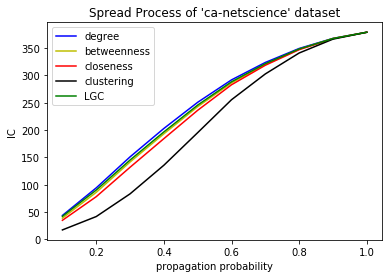

In [38]:
plt.plot(b, d, 'b', label='degree')
plt.plot(b, bw, 'y', label='betweenness')
plt.plot(b, c, 'r', label='closeness')
plt.plot(b, cc, 'black', label='clustering')
plt.plot(b, lgc, 'g', label='LGC')

plt.legend()
plt.ylabel('IC')    
plt.xlabel('propagation probability')
plt.title("Spread Process of 'ca-netscience' dataset")
plt.show

No handles with labels found to put in legend.


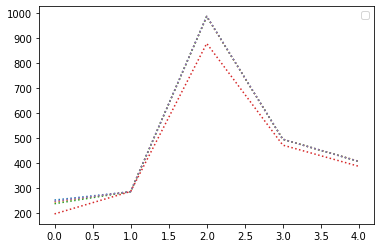

In [26]:
import numpy as np

plt.plot(np.array([250.887,284.517,986.932,494.355,405.455]), linestyle = 'dotted')
plt.plot(np.array([242.855,284.517,986.13,494.235,405.837]), linestyle = 'dotted')
plt.plot(np.array([236.255,284.517,986.145,494.255,405.455]), linestyle = 'dotted')
plt.plot(np.array([195.373,285.175,877.962,470.841,385.868]), linestyle = 'dotted')
plt.plot(np.array([245.731,284.517,986.932,494.355,405.455]), linestyle = 'dotted')


plt.show()